In [1]:
import matplotlib.pyplot as plt
import numpy as np
from custom_sepsis import *


In [37]:
# ts_eval = ThompsonSampling.load("data/thompson_sampling/TS-100.pkl")
dqn_training = train_dqn(true_env, 100_000, "Test")
# dqn_training = Training.load("data/trainings/DQN-Test_object.pkl")

In [7]:
nr_iterations = 100
nr_episodes = 10

episodes = []
tr = transition_model()
V = np.zeros(len(STATES))
learned = [matrix_value_iteration(V, tr)]
hr_counts = init_hr_counts()
bp_counts = init_bp_counts()
o2_counts = init_o2_counts()
glu_counts = init_glu_counts()
state_counts = hr_counts, bp_counts, o2_counts, glu_counts
pol, V = learned[0]

In [16]:
for _ in range(nr_iterations):
    tr = transition_model(state_counts[0], state_counts[1], state_counts[2], state_counts[3])
    opt_pol = matrix_value_iteration(V, tr)
    learned.append(opt_pol)
    pol, V = opt_pol
    # Run episodes with the current policy
    for _ in range(nr_episodes):
        episode = run_episode(pol)
        episodes.append(episode)
        state_counts = update_counts(episode, state_counts[0], state_counts[1], state_counts[2], state_counts[3])

KeyboardInterrupt: 

In [32]:
ts_eval = ThompsonSampling(len(episodes), episodes, "TS-10", {"description": f"Running {nr_episodes} episodes per iteration. Updating the policy upon each iteration.", "optimization": "Matrix Value Iteration, gamma=0.99, theta=1e-6"})
ts_eval.save()


'data/thompson_sampling/TS-10.pkl'

In [33]:
len(ts_eval.episodes)


110

In [34]:
ts_eval.evaluate_policy(100000)

-0.40705

In [35]:
dqn_training.evaluate_policy(100000)

-0.38607

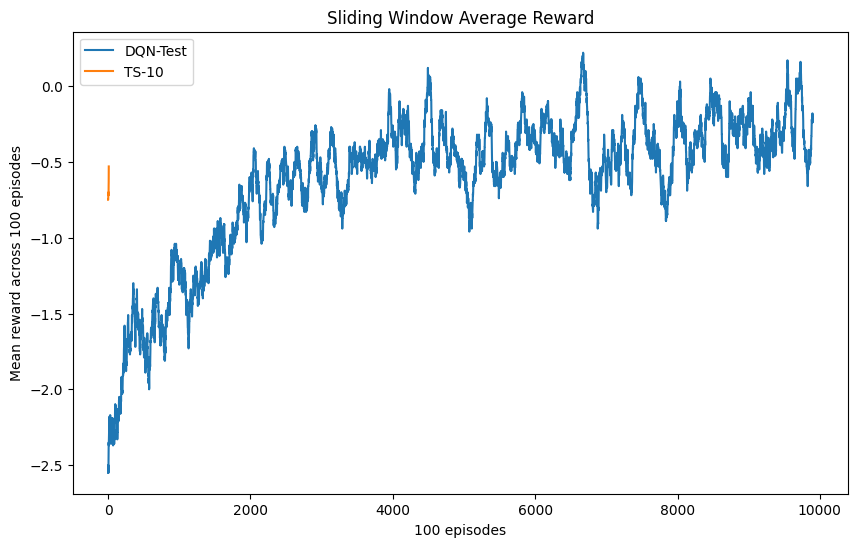

In [39]:
plot_rewards([dqn_training, ts_eval], 50000, 100)

In [26]:
nr_iterations = 100
nr_episodes = 1000

episodes = []
tr = transition_model()
V = np.zeros(len(STATES))
learned = [matrix_value_iteration(V, tr)]
state_counts = np.ones((len(STATES), len(ACTIONS), len(STATES)))
pol, V = learned[0]

In [ ]:
for _ in range(nr_iterations):
    tr = transition_model(state_counts)
    opt_pol = matrix_value_iteration(V, tr)
    learned.append(opt_pol)
    pol, V = opt_pol
    # Run episodes with the current policy
    for _ in range(nr_episodes):
        episode = run_episode(pol)
        episodes.append(episode)
        state_counts = update_state_counts(episode, state_counts)

In [ ]:
ts_eval_1000 = ThompsonSampling(len(episodes), episodes, "TS-1000", {"description": f"Running {nr_episodes} episodes per iteration. Updating the policy upon each iteration.", "optimization": "Matrix Value Iteration, gamma=0.99, theta=1e-6"})
ts_eval_1000.save()
# ts_eval_10 = ThompsonSampling.load("data/thompson_sampling/TS-1000.pkl")

'data/thompson_sampling/TS-1000.pkl'

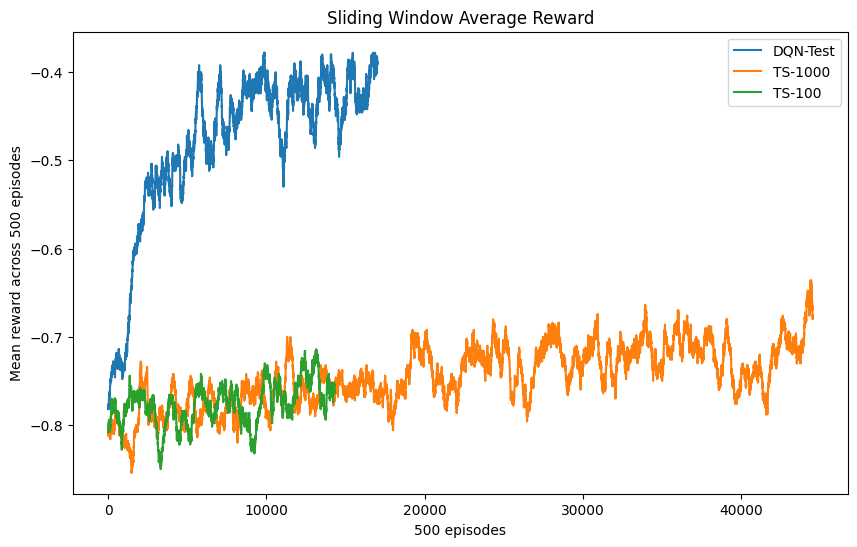

In [33]:
plot_rewards([dqn_training, ts_eval_1000, ts_eval], 50000, 500)


In [ ]:
# nr_iterations = 1000
# nr_episodes = 100

# episodes = []
# tr = transition_model()
# V = np.zeros(len(STATES))
# learned = [matrix_value_iteration(V, tr)]
# state_counts = np.ones((len(STATES), len(ACTIONS), len(STATES)))
# pol, V = learned[0]

In [ ]:
# for i in range(nr_iterations):
#     tr = transition_model(state_counts)
#     opt_pol = matrix_value_iteration(V, tr)
#     learned.append(opt_pol)
#     pol, V = opt_pol
#     # Run episodes with the current policy
#     for _ in range(nr_episodes):
#         episode = run_episode(pol)
#         episodes.append(episode)
#         state_counts = update_state_counts(episode, state_counts)

In [ ]:
# ts_eval_resV = ThompsonSampling(len(episodes), episodes, "TS-100b", {"description": f"Running {nr_episodes} episodes per iteration. Updating the policy upon each iteration.", "optimization": "Matrix Value Iteration, gamma=0.99, theta=1e-6"})
# ts_eval_resV.save()

'data/thompson_sampling/TS-100b.pkl'

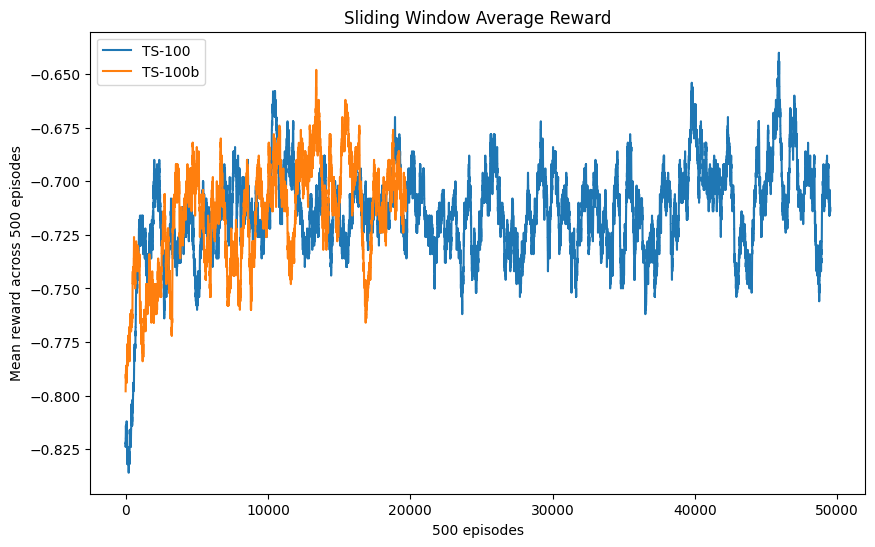

In [ ]:
# ev.plot_rewards([ts_eval, ts_eval_resV], 50000, 500)
